In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import io

In [2]:
df0 = pd.read_csv('bench.csv', index_col=0)
df1 = pd.DataFrame({
    'no': [],
    'speed_up': []
})

In [3]:
for rep in range(0, 10):
    df_ = pd.read_csv(f'speed_up{rep}.csv', names=['no', 'speed_up'], skiprows=[0])
    #df_['rep'] = pd.Series([rep] * len(df_), name='rep')
    df1 = df1.append(df_, ignore_index=True)

In [4]:
grp = df1.groupby(by='no')
x = grp.mean().index.to_numpy()
mean = grp.mean()['speed_up'].to_numpy()
min = grp.min()['speed_up'].to_numpy()
max = grp.max()['speed_up'].to_numpy()

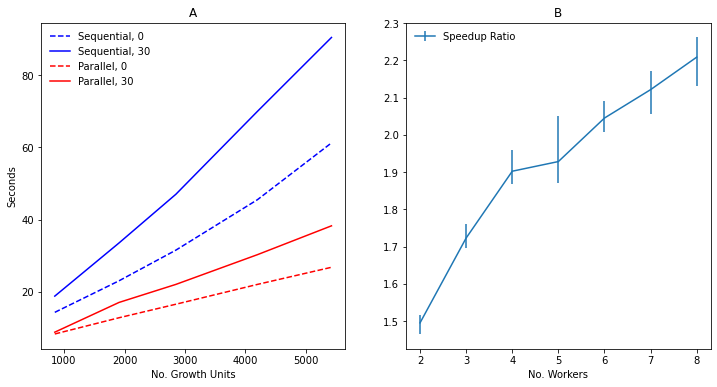

In [5]:
fig, (ax0, ax1) = plt.subplots(ncols=2, sharey=False, figsize=(12, 6))
S0, = ax0.plot(df0.index, df0.S0 / 4, 'b--')
S30, = ax0.plot(df0.index, df0.S30 / 4, 'b-')
P0, = ax0.plot(df0.index, df0.P0 / 4, 'r--')
P30, = ax0.plot(df0.index, df0.P30 / 4, 'r-')
ax0.legend([S0, S30, P0, P30], ['Sequential, 0', 'Sequential, 30', 'Parallel, 0', 'Parallel, 30'], loc='upper left', frameon=False)
ax0.set_xlabel('No. Growth Units')
ax0.set_ylabel('Seconds')
ax0.set_title('A')
SP = ax1.errorbar(x, mean, yerr=[max - mean, mean - min])
ax1.legend([SP], ['Speedup Ratio'], loc='upper left', frameon=False)
ax1.set_title('B')
_ = ax1.set_xlabel('No. Workers')